<a href="https://colab.research.google.com/github/toxtli/autoencoder-perceptron-mnist-svm/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Excercise 3**

In [2]:
import numpy as np
from keras.models import Model
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.svm import LinearSVC
from keras.layers import Input, Dense
from sklearn.metrics import accuracy_score

def plot_traincurve(history):
    colors = {'loss':'r', 'acc':'b', 'val_loss':'m', 'val_acc':'g'}
    plt.figure(figsize=(10,6))
    plt.title("Training Curve") 
    plt.xlabel("Epoch")

    for measure in history.keys():
        color = colors[measure]
        ln = len(history[measure])
        plt.plot(range(1,ln+1), history[measure], color + '-', label=measure)  # use last 2 values to draw line

    plt.legend(loc='upper left', scatterpoints = 1, frameon=False)

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# this is the size of our encoded representations
encoding_dim = 5  

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [4]:
history = autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.4031 - val_loss: 0.2761
Epoch 2/30
60000/60000 [==============================] - 1s 24us/step - loss: 0.2731 - val_loss: 0.2696
Epoch 3/30
60000/60000 [==============================] - 1s 24us/step - loss: 0.2672 - val_loss: 0.2631
Epoch 4/30
60000/60000 [==============================] - 1s 25us/step - loss: 0.2591 - val_loss: 0.2532
Epoch 5/30
60000/60000 [==============================] - 1s 25us/step - loss: 0.2493 - val_loss: 0.2439
Epoch 6/30
60000/60000 [==============================] - 1s 24us/step - loss: 0.2415 - val_loss: 0.2370
Epoch 7/30
60000/60000 [==============================] - 1s 25us/step - loss: 0.2353 - val_loss: 0.2309
Epoch 8/30
60000/60000 [==============================] - 2s 25us/step - loss: 0.2298 - val_loss: 0.2263
Epoch 9/30
60000/60000 [==============================] - 1s 25us/step - loss: 0.2263 - val_loss: 0.2237
Epoch

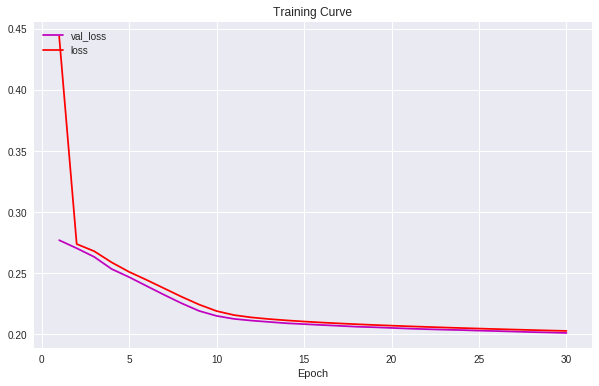

In [31]:
plot_traincurve(history.history)
encoded_imgs_train = encoder.predict(x_train)
encoded_imgs_test = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs_test)
encoded_imgs_train_normalized = encoded_imgs_train / np.max(encoded_imgs_train)
encoded_imgs_test_normalized = encoded_imgs_test / np.max(encoded_imgs_test)

In [1]:
clf_svm = LinearSVC()
clf_svm.fit(encoded_imgs_train_normalized, np.argmax(y_train, axis=1))
y_pred_svm = clf_svm.predict(encoded_imgs_test_normalized)
acc_svm = accuracy_score(np.argmax(y_test, axis=1), y_pred_svm)
print("Linear SVM accuracy: ",acc_svm)

NameError: ignored

**Exercise 2**

In [79]:
from keras.layers import Input, Dense
from keras.datasets import mnist
from keras.models import Model
import numpy as np

# size of bottleneck latent space
encoding_dim = 60
# input placeholder
input_img = Input(shape=(784,))
# encoded representation
encoded = Dense(encoding_dim, activation='relu')(input_img)
# lossy reconstruction
decoded = Dense(784, activation='sigmoid')(encoded)

# full AE model: map an input to its reconstruction
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [80]:
history = autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.2119 - acc: 0.7969 - val_loss: 0.1407 - val_acc: 0.8076
Epoch 2/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.1241 - acc: 0.8104 - val_loss: 0.1125 - val_acc: 0.8118
Epoch 3/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.1053 - acc: 0.8129 - val_loss: 0.0988 - val_acc: 0.8125
Epoch 4/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.0967 - acc: 0.8138 - val_loss: 0.0930 - val_acc: 0.8130
Epoch 5/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.0918 - acc: 0.8143 - val_loss: 0.0897 - val_acc: 0.8133
Epoch 6/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.0887 - acc: 0.8145 - val_loss: 0.0869 - val_acc: 0.8138
Epoch 7/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.0865 - acc: 0.8147 - val_loss: 0.0843 - 

4
(784, 60)
(60,)
(60, 784)
(784,)


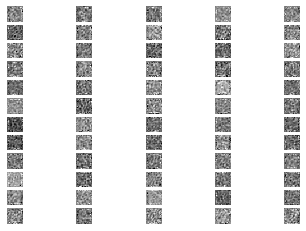

[ 1.7120806  -1.4750342   1.7741405   1.7843827   1.8288056   1.7083046
  1.8284625  -0.35284007 -1.4507003  -0.13808613  1.8338412  -0.7067133
  1.7463831   1.7577382  -0.9895905  -1.0494511  -1.219489   -0.74758756
 -1.0038114   1.8173583   1.768065   -1.2664334   1.7398041  -1.431406
  1.7219796   1.6633002   1.7983902   1.7442199   1.755357   -1.1590273
  1.8409371  -0.94953173 -0.6967929   1.6663647   1.8212647   1.8001103
  1.5915378   1.8691081   1.4797207   1.4759276   1.6198237  -0.22189727
  1.8415582   1.814344   -1.2258053   1.789647    1.7678033   1.8733039
  1.426062   -0.7054322  -1.2570075   1.7915452   1.6762421  -0.37666357
  1.7288433  -0.9285175  -1.3681237   1.7977958  -1.5123674   1.8619486 ]


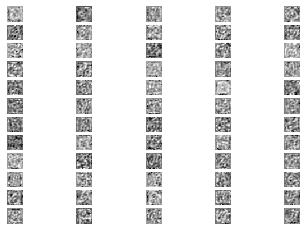

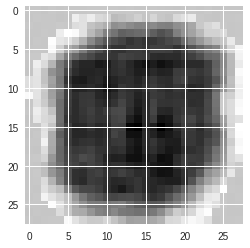

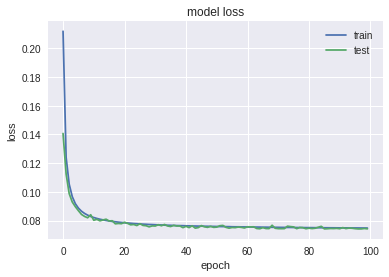

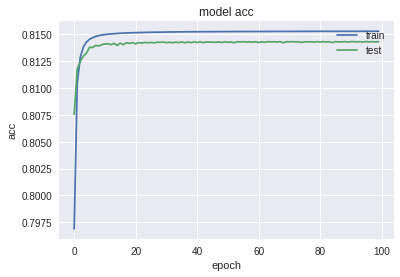

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

#print(autoencoder.get_weights()[0].reshape((5, 28, 28)))
print(len(autoencoder.get_weights()))
print(autoencoder.get_weights()[0].shape)
print(autoencoder.get_weights()[1].shape)
print(autoencoder.get_weights()[2].shape)
print(autoencoder.get_weights()[3].shape)
weights = autoencoder.get_weights()[0]
for i in range(len(weights[0])):
  ax = plt.subplot(len(weights[0])/5, 5, i + 1)
  plt.imshow(weights[:,i].reshape(28, 28))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
print(autoencoder.get_weights()[1])
weights = autoencoder.get_weights()[2]
for i in range(len(weights)):
  ax = plt.subplot(len(weights)/5, 5, i + 1)
  plt.imshow(weights[i].reshape(28, 28))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
plt.imshow(autoencoder.get_weights()[3].reshape(28, 28))
plt.show()
#print(autoencoder.get_weights()[0][:,0].reshape((28, 28)))

def plot_train_history_loss(history):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    # summarize history for loss
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model acc')
    plt.ylabel('acc')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

plot_train_history_loss(history)

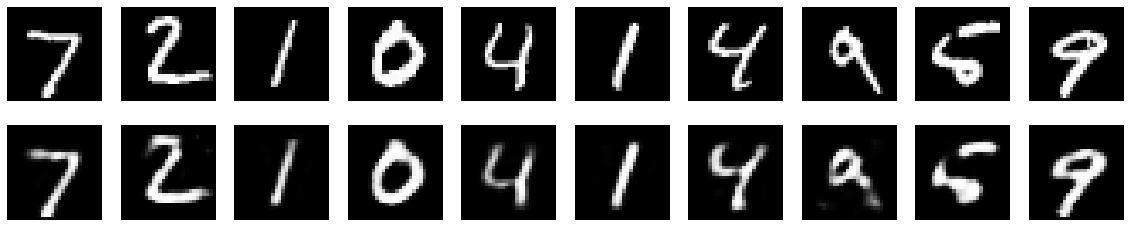

In [72]:
# encode and decode some images from test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

def display_reconstructed(x_test, decoded_imgs, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if decoded_imgs is not None:
            # display reconstruction
            ax = plt.subplot(2, n, i + 1 + n)
            plt.imshow(decoded_imgs[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()

display_reconstructed(x_test, decoded_imgs, 10)

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

# size of bottleneck latent space
encoding_dim = 32
# input placeholder
input_img = Input(shape=(784,))
# encoded representation
encoded = Dense(encoding_dim, activation='relu')(input_img)
# lossy reconstruction
decoded = Dense(784, activation='sigmoid')(encoded)

# full AE model: map an input to its reconstruction
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


In [0]:
# encoder: map an input to its encoded representation
encoder = Model(input_img, encoded)
# placeholder for an encoded input
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [4]:
from keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape, x_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 784) (10000, 784)


In [5]:
history = autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.2388 - val_loss: 0.1640
Epoch 2/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.1448 - val_loss: 0.1301
Epoch 3/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1227 - val_loss: 0.1156
Epoch 4/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1127 - val_loss: 0.1087
Epoch 5/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1074 - val_loss: 0.1047
Epoch 6/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1041 - val_loss: 0.1029
Epoch 7/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1020 - val_loss: 0.0996
Epoch 8/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1004 - val_loss: 0.0986
Epoch 9/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.0993 - val_loss: 0.0

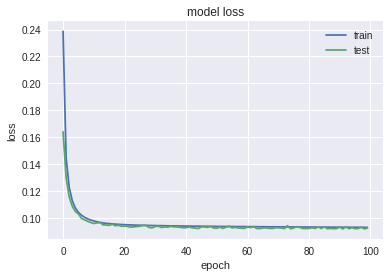

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_train_history_loss(history):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

plot_train_history_loss(history)

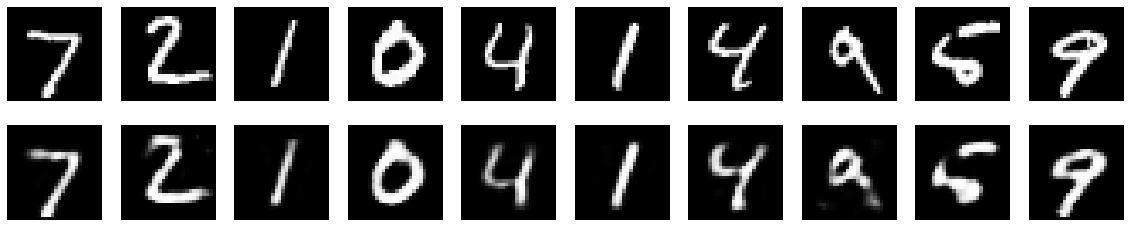

In [7]:
# encode and decode some images from test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

def display_reconstructed(x_test, decoded_imgs, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if decoded_imgs is not None:
            # display reconstruction
            ax = plt.subplot(2, n, i + 1 + n)
            plt.imshow(decoded_imgs[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()

display_reconstructed(x_test, decoded_imgs, 10)

In [0]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 2s 39us/step - loss: 0.2057 - val_loss: 0.1584
Epoch 2/150
60000/60000 [==============================] - 2s 33us/step - loss: 0.1522 - val_loss: 0.1370
Epoch 3/150
60000/60000 [==============================] - 2s 33us/step - loss: 0.1356 - val_loss: 0.1313
Epoch 4/150
60000/60000 [==============================] - 2s 33us/step - loss: 0.1261 - val_loss: 0.1231
Epoch 5/150
60000/60000 [==============================] - 2s 33us/step - loss: 0.1201 - val_loss: 0.1129
Epoch 6/150
60000/60000 [==============================] - 2s 34us/step - loss: 0.1152 - val_loss: 0.1153
Epoch 7/150
60000/60000 [==============================] - 2s 33us/step - loss: 0.1115 - val_loss: 0.1131
Epoch 8/150
60000/60000 [==============================] - 2s 33us/step - loss: 0.1085 - val_loss: 0.1047
Epoch 9/150
60000/60000 [==============================] - 2s 33us/step - loss: 0.1059 - val_loss: 0.1

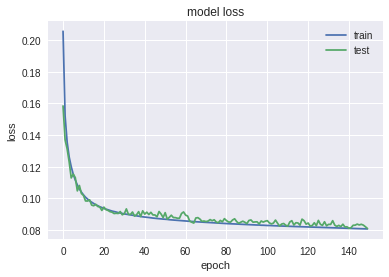

In [12]:
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train,
                epochs=150,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

plot_train_history_loss(history)

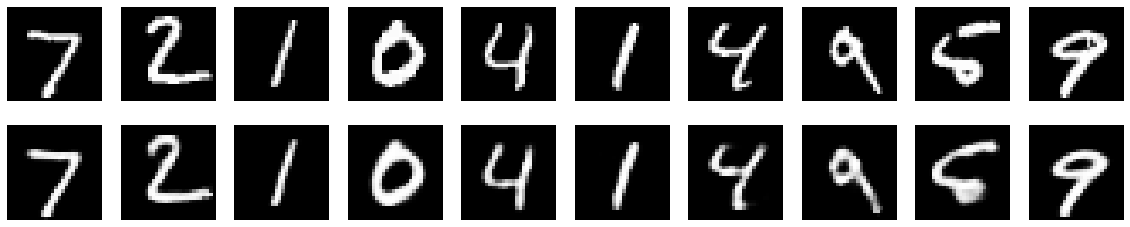

In [13]:
decoded_imgs = autoencoder.predict(x_test)
display_reconstructed(x_test, decoded_imgs, 10)